# 2022 COSE361 실습 4차시- Machine learning 2

<과제 제출방법>

1.   제목 끝에 학번과 이름을 추가합니다. 예시) 인공지능_4차시_20XXXXXXXX_이름
2.   주피터노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
3.   모든 셀이 출력되어있는 상태로 제출합니다
-------------------------------------------------------------------------------------------------------------------

본 실습은 아래와 같이 이루어져있습니다.
1. Perceptron
    - XOR problem
    
2. MLP    
    - XOR problem
    
    -  bread cancer data
        - Cross validation
        - Gridsearchcv
3. 과제

# **1. Perceptron**

퍼셉트론은 신경망의 가장 기초가 되는 기본 단위입니다.

자세히 보면 "퍼셉트론(Perceptron)"이라는 단어는 두 단어의 조합임을 알 수 있습니다.

* Perception 무엇인가를 감지할 수 있는 능력
* Neuron 사람의 뇌에 주어지는 입력을 의미있는 정보로 변환하는 신경 세포

### **퍼셉트론(Perceptron)의 구성 요소**

퍼셉트론은 간단한 결정을 내릴 수 있는 인공 뉴런이라고 할 수 있습니다.

퍼셉트론은 3가지 구성요소로 이루어져 있습니다.

* 입력(Inputs): 각각의 입력 값은 feature에 대응합니다. 

* 가중치(Weights): 각 입력은, 중요도를 나타내는 가중치를 가지고 있습니다. 입력의 가중치가 크다는 것은, 결정을 내림에 있어서 해당 입력값이 중요한 역할을 하고 있다는 것을 의미합니다.

* 출력(Output): 마지막으로, 퍼셉트론은 입력과 가중치를 사용하여 출력을 생성합니다. 출력 유형은 문제의 특성 및 데이터 도메인에 따라 다릅니다. 참과 거짓을 해결해야하는 문제(Classification)라면 0 또는 1로 출력값을 나타내야할 것이고, 만약 결과값이 연속된 수치(Regression)라면 정수로 결과값을 표현할 수 있어야할 것입니다.

![Perceptron](http://incredible.ai/assets/posts/Perceptron/perceptron.png)

이제, perceptron으로 AND OR XOR 데이터를 분류해보도록 합시다. 

#  XOR problem

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FsEm4q%2FbtqHemtBDX5%2FxKv8Pa7Pj1Gw5WPBhUHKY0%2Fimg.png)

AND, OR, XOR 데이터에 대해 Perceptron으로 분류해보도록 하겠습니다. 시각화를 도와주는 utils.py를 사용하도록 할 것입니다. import해주고 실험을 진행하도록 하겠습니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/My Drive/ex4/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#제공된 utils import
from utils import *
#numpy import
import numpy as np
#sklearn에서 제공해주는 Perceptron import
from sklearn.linear_model import Perceptron

## 1-1. AND 데이터

In [4]:
#AND 데이터를 생성합니다.
and_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
#and label 
and_labels = np.array([0, 0, 0, 1])

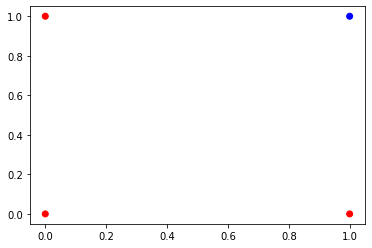

In [5]:
#utils에서 제공되는 plot_data 사용하여 AND데이터를 plot해봅시다
plot_data(and_data, and_labels)

In [6]:
#perceptron을 AND 데이터에 대하여 훈련시킵니다.
perceptron_and = Perceptron()
perceptron_and.fit(and_data, and_labels)

Perceptron()

In [7]:
perceptron_and.score(and_data, and_labels)

1.0

In [8]:
#perceptron의 AND score들을 출력합니다.
pred_scores = perceptron_and.decision_function(and_data)
print("Perceptron's AND scores: {}".format(pred_scores))

Perceptron's AND scores: [-2.  0.  0.  2.]


이제, Perceptron의 decision boundary를 플롯해봅시다. 왼쪽의 색상 막대는 w b x + b로 얻은 점수를 나타냅니다. 각 점 색상은 다른 클래스를 나타냅니다. (blue = 1, red = 0).

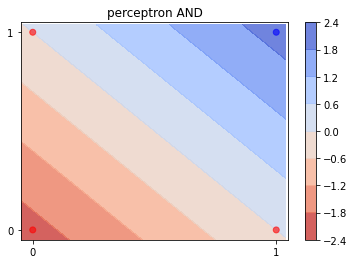

In [9]:
# colobar는 wx+b로 얻은 score를 나타냅니다.
plot_decision_boundary(perceptron_and, and_data, and_labels, "perceptron AND")

## 1-2. OR 데이터
AND와 마찬가지로 or데이터를 생성하여 perceptron으로 분류하도록 훈련시키도록 하겠습니다.

In [10]:
#or 데이터 생성
or_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

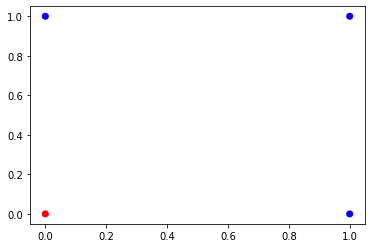

In [11]:
#utils에서 제공되는 plot_data 사용하여 OR데이터를 plot해봅시다
plot_data(or_data, or_labels)

In [12]:
#or 데이터 훈련
perceptron_or = Perceptron()
perceptron_or.fit(or_data, or_labels)

Perceptron()

In [13]:
#perceptron의 OR score들을 출력합니다.
pred_scores = perceptron_or.decision_function(or_data)
print("Perceptron's OR scores: {}".format(pred_scores))

Perceptron's OR scores: [-1.  1.  1.  3.]


In [14]:
perceptron_or.score(or_data, or_labels)

1.0

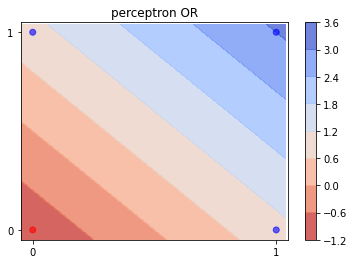

In [15]:
# colobar는 wx+b로 얻은 score를 나타냅니다.
plot_decision_boundary(perceptron_or, or_data, or_labels, "perceptron OR")

## 1.3 XOR 데이터
AND와 OR과 마찬가지로 XOR데이터에 대해서도 perceptron이 분류를 잘 할 수 있는지를 확인해보도록 하겠습니다.

In [16]:
#xor 데이터 생성
xor_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

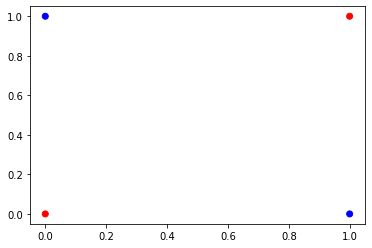

In [17]:
plot_data(xor_data, xor_labels)

명확하게, XOR은 선을 그어 구분 할 수 없음을 알 수 있습니다. 그래도 Perceptron으로 분류하도록 훈련시켜보도록 하겠습니다.

In [18]:
perceptron_xor = Perceptron()
perceptron_xor.fit(xor_data, xor_labels)

Perceptron()

In [19]:
perceptron_xor.score(xor_data, xor_labels)

0.5

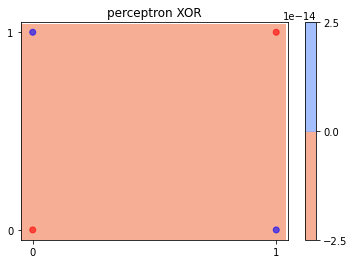

In [20]:
plot_decision_boundary(perceptron_xor, xor_data, xor_labels, "perceptron XOR")

XOR의 decision boundary가 없는 것을 확인 할 수 있습니다. 이제 Perceptron 모델 대신, MLPClassifier을 사용하여 XOR 데이터를 분류해보겠습니다. 아래 네 단계를 수행합니다.



# 2. Multi-layer Perceptron(MLP)

MLP는 입력층, 은닉층 및 출력층의 적어도 3개의 다른 층으로 구성된 뉴럴 네트워크입니다. 입력층을 제외한 나머지 층은 non-linaer activation function(ex: Sigmoid 또는 tanh)를 가진 Perceptron에 의해 구성됩니다. MLP는 보통 역전파 알고리즘을 사용하여 훈련되며 선형적으로 분리할 수 없는 문제에 대처할 수 있습니다. 

아래 애니메이션은 MLP가 훈련되는 과정을 간략하게 보여줍니다.

![](https://953894.smushcdn.com/2611031/wp-content/uploads/2019/10/Backpropagation.gif?lossy=0&strip=1&webp=1)


## 2-1 MLP XOR problem
이제 scikit-learn에서 제공해주는 MLPClassifier 메서드를 사용하여 XOR문제를 해결해보도록 하겠습니다.

1. scikit-learn의 MLPClassifier 모델을 생성하고 (모델의 이름은 ```mlp_xor```)합니다. 모델 파라미터는 다음과 같습니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

    - ```hidden_layer_sizes```: ```(5, )```
    - ```activation```: ```'tanh'```
    - ```max_iter``` : ```10000```

2. 생성된 모델을 데이터에 ```.fit()```해봅니다. 
3. ```.score()```로 데이터에 대해 정확도를 출력합니다.
4. ```plot_decision_boundary()``` 함수를 사용하여 훈련된 perceptron의 decision boundary를 시각화하고 **시각화된 plot을 바탕으로 올바르게 분류가 되었는지를 확인합니다.**.

In [21]:
#import MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(5, ), activation='tanh', max_iter=10000)
mlp_xor.fit(xor_data, xor_labels)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=10000)

In [22]:
mlp_xor.score(xor_data, xor_labels)

1.0

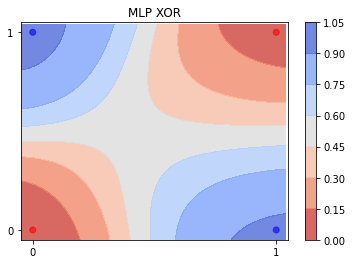

In [23]:
plot_decision_boundary(mlp_xor, xor_data, xor_labels, "MLP XOR")

decision boundary를 제대로 잘 설정한것을 볼 수 있습니다. 이로써, MLP는 선형적으로 분리할 수 없는 문제에 대처할 수 있음을 알 수 있습니다.

# 2-2 bread cancer 

이제 다른 복잡한 데이터를 사용하여 MLPClassifier을 훈련시키도록 해봅시다.

본 실습에서는bread cancer 데이터를 사용하도록 하겠습니다.


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [25]:
data_url = 'https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/breastcancer.csv'
df = pd.read_csv(data_url)
df.head()           

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2-2-1 Data preprocess

In [26]:
# id 와 Unnamed: 32 column을 삭제한 후 column들의 리스트를 출력합니다.
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
# 각 column에 na 값이 있지는 않은지 확인합니다.
df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [28]:
# label이 어떻게 구성되어있나 봅니다.
#B: 악성
#M: 양성
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


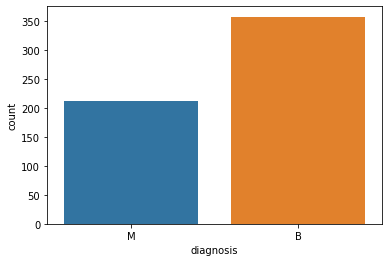

In [29]:
#label을 시각화 해봅시다
import seaborn as sns
sns.countplot(df['diagnosis'])
plt.show()

In [30]:
#label과 feature들을 분리시킵니다
#y: 데이터셋의 label(or class)
y = df['diagnosis']
#X: 데이터 셋의 feature들
X = df.drop(columns=['diagnosis'])

In [31]:
#train 데이터= X_train(feature들), y_train(class)
#test 데이터 = X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

데이터가 준비가 되었으니 이제 mlpclassifier을 훈련시켜보도록 합시다.

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [33]:
print('mlp accuracy: ', mlp.score(X_test, y_test))

mlp accuracy:  0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


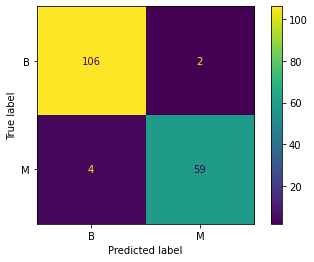

In [34]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp, X_test, y_test, normalize=None, values_format='d')

## 2-2-2 Cross Validation (CV)

교차 검증이란 쉽게 생각하면 본고사를 치르기 전 모의고사를 여러 번 보는 것입니다.

본고사는 테스트 데이터 세트에 대한 마지막 평가로 이해할 수 있고 모의고사는 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것입니다.


교차검증이 왜 필요한가?


*  과적합(overfitting)을 피하면서 신뢰성있는 모델평가를 진행하기 위함.
*   일반화  성능을  확인하기  위해  훈련  세트와  테스트  세트로  한번  나누는  것보다 더  안정적이고  뛰어난  통계적  평가  방법


![](https://scikit-learn.org/0.24/_images/grid_search_workflow.png)

## k-fold cross validation

1.   전체 데이터셋을 training /test set으로 분리
2.   training 데이터를 임의의 K개의 fold로 나눔
3.   각 split마다 돌아가면서 한개의 fold데이터셋을 validation data로 지정
4.   이외의 data는 train 데이터로 모델을 훈련시키는데 사용
5.   각 split마다 validation 데이터를 사용하여 모델을 검증
6.   각 split의 검증된 결과들의 평균을 측정


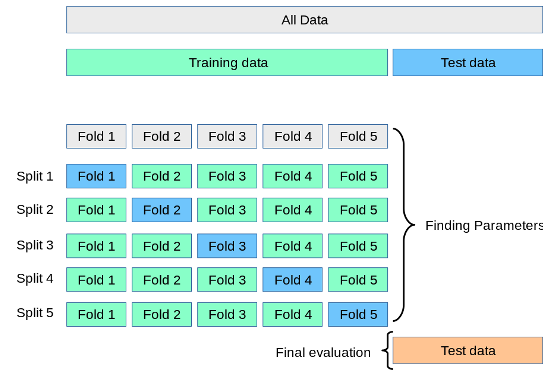


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

scikit learn에서 제공해주는 KFold를 사용하여 kfold시 데이터가 어떻게 split되는지를 실험해봅시다. 
5fold를 실행해보도록 하겠습니다.

In [35]:
n_iter =0
# 데이터셋을 train과 validation으로 나누어주는 KFold를 알아봅니다.
from sklearn.model_selection import KFold

 #train/validation set을 n_splits번 만큼 진행해줌.
kf = KFold(n_splits=5)

#kf.split(x_train)은 x_train데이터 셋을 K번
#train/validation set로 분리시킴
for train_index, val_index in kf.split(X_train):
  n_iter+=1
  #feature data 나눈것
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  #label(class) data 나눈것
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print('\n===교차 검증 : {0}==='.format(n_iter))
  #data가 어떻게 각 fold마다 나뉘는지 출력
  print(y_train_cv.value_counts())


===교차 검증 : 1===
B    194
M    124
Name: diagnosis, dtype: int64

===교차 검증 : 2===
B    197
M    121
Name: diagnosis, dtype: int64

===교차 검증 : 3===
B    200
M    118
Name: diagnosis, dtype: int64

===교차 검증 : 4===
B    207
M    112
Name: diagnosis, dtype: int64

===교차 검증 : 5===
B    198
M    121
Name: diagnosis, dtype: int64


각 fold마다 데이터가 나뉘는 것을 볼 수 있습니다. 이제 k-fold cross validation을 간단하게 구현할 수 있는 sklearn이 cross_validate를 사용해서 5-fold cross validation을 해보도록 합시다. 
파라미터 중 cv는 fold의 갯수라고 생각하시면 됩니다.

In [36]:
# 5-fold cross validation
from sklearn.model_selection import cross_validate
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)

In [37]:
#각 fold마다의 validation score을 출력해봅시다.
cv_results['test_score']

array([0.9375    , 0.8625    , 0.95      , 0.93670886, 0.89873418])

In [38]:
# 각 fold마다의 validation accuracy의 평균을 내봅시다. 
print(np.mean(cv_results['test_score']))

0.9170886075949367


## 2-2-3 Gridsearch cross validation

이제 모델의 최적의 하이퍼파라미터를 쉽게 찾을 수 있게 도와주는 gridsearch cv를 사용하여 최적의 하이퍼파라미터를 찾아보도록 하겠습니다.


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fduzlch%2FbtqQZwOb3Jr%2FKVP1kpnWpIytGZLK4k10Nk%2Fimg.png)


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
#import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [40]:
#test하고 싶은 파라미터들을 설정합니다
parameter_space = {
    'hidden_layer_sizes': [(3,3), (10,),(100,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

In [41]:
#parameter space의 파라미터들에 대하여 10-cross validation을 하여 최적의 파라미터를 찾습니다.
#n_jobs=-1 , using all the CPU cores available.
clf_cv = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), parameter_space, n_jobs=-1, cv=10)
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(3, 3), (10,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [42]:
#최고의 성능을 내는 파라미터를 출력합니다.
print('Best parameters found:\n', clf_cv.best_params_)
#cross validation의 best score을 출력합니다.
print("Accuracy CV:",clf_cv.best_score_)

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy CV: 0.939551282051282


In [43]:
#최고의 하이퍼파라미터를 저장.
best_config_gs = clf_cv.best_params_
mlp_best=MLPClassifier(random_state=1, max_iter=5000, **best_config_gs) #새로 만든 mlpclassifier에 파라미터로 입력합니다.
#train 데이터로 훈련을 시킨 후
mlp_best.fit(X_train,y_train)

MLPClassifier(activation='tanh', max_iter=5000, random_state=1)

Confusion matrix를 출력해봅니다.

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

predict_train = mlp_best.predict(X_train)
predict_test = mlp_best.predict(X_test)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[244   5]
 [  7 142]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       249
           M       0.97      0.95      0.96       149

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [45]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[107   1]
 [  4  59]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


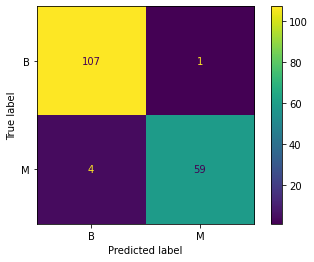

In [46]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp_best, X_test, y_test, normalize=None, values_format='d')

# 실습 과제(총 30점)

실습 4차시 과제는 실습 3차시에서 사용한 abalone dataset을 사용하여 MLPClassifier을 훈련시킬 것입니다.

1. abalone dataset을 preprocessing하고, train, test dataset으로 나누세요.(3차시 코드를 가져와도 상관없습니다.) (1점)
2. scikit-learn의 MLPClassifier을 사용하여 어떠한 모델 파라미터도 조정하지 않은 baseline ```MLPClassifier``` 모델을 생성하고 훈련시켜 테스트 데이터에 대한 정확도를 출력합니다. (1점)
3. 두번째 MLPClassifier 모델을 생성합니다. 이번에는 다큐멘테이션을 읽고 모델 파라미터를 조정합니다. 조정하는 파라미터는 ```hidden_layer_sizes```, ```activation```, ```learning_rate_init```, ```max_iter``` 입니다. 네가지 파라미터를 모두 조정하여도 되고 이 중 선택하여 조정하여도 됩니다. 이 모델이 baseline 모델보다 테스트 데이터에 대해 정확도가 높게 나오도록 파라미터를 조정해야 합니다. 두번째 모델에 대한 정확도 또한 출력합니다.(8점) 

MLPClassifer document: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

4. GridseachCV를 사용하여 best_params_를 찾고, 출력합니다.(위의 실습에서 사용한 parameter_space를 사용하여도, 본인이 설정하여 실험하여도 상관 없습니다.) (10점)
5. 4번에서 찾은 best parameter을 사용하여 새로운 MLPClassifier을 훈련시키고, confusion matrix를 출력합니다.(10점)

**1. abalone dataset을 preprocessing하고, train, test dataset으로 나누세요.(3차시 코드를 가져와도 상관없습니다.) (1점)**

In [47]:
# import abalone data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header = None)

In [48]:
#data preprocessing
df = df.dropna()
df.columns = ["gender", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]

onehot_df = pd.get_dummies(df.gender, prefix="gender")
df = pd.concat([onehot_df, df], axis=1).drop(["gender"], axis=1)

disc_label = pd.cut(df.rings, bins=[0, 9, 30], labels=[0, 1])
df = df.drop(["rings"], axis=1)
df = pd.concat([df, disc_label.to_frame()], axis=1)
df.head()

,gender_F,gender_I,gender_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [49]:
# split train, validation and test data
from sklearn.model_selection import train_test_split

y = df[["rings"]]
X = df.drop(["rings"], axis=1)


#train과 test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2505, 10)
(836, 10)
(836, 10)


**2. scikit-learn의 MLPClassifier을 사용하여 어떠한 모델 파라미터도 조정하지 않은 baseline MLPClassifier 모델을 생성하고 훈련시켜 테스트 데이터에 대한 정확도를 출력합니다. (1점)**

In [52]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [55]:
print('MLP Accuracy: ', MLP.score(X_test, y_test))

MLP Accuracy:  0.7942583732057417


**3. 두번째 MLPClassifier 모델을 생성합니다. 이번에는 다큐멘테이션을 읽고 모델 파라미터를 조정합니다. 조정하는 파라미터는 hidden_layer_sizes, activation, learning_rate_init, max_iter 입니다. 네가지 파라미터를 모두 조정하여도 되고 이 중 선택하여 조정하여도 됩니다. 이 모델이 baseline 모델보다 테스트 데이터에 대해 정확도가 높게 나오도록 파라미터를 조정해야 합니다. 두번째 모델에 대한 정확도 또한 출력합니다.(8점)**

In [56]:
#test for the best hidden_layer_size

data1 = {'Accuracy': [], 'h_lyr_size': []}
df_data1 = pd.DataFrame(data1)

for i in range(2,101,2): 
  MLP_modified = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=42)
  MLP_modified.fit(X_train, y_train)
  new_row = {'Accuracy': MLP_modified.score(X_test, y_test),'h_lyr_size':i}
  df_data1 = df_data1.append(new_row, ignore_index=True)

df_data1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

,Accuracy,h_lyr_size
0,0.775120,2.0
1,0.789474,4.0
2,0.785885,6.0
3,0.782297,8.0
4,0.791866,10.0
5,0.784689,12.0
6,0.793062,14.0
7,0.793062,16.0
8,0.793062,18.0
9,0.782297,20.0


Accuracy    0.797847
dtype: float64 Accuracy    86.0
dtype: float64


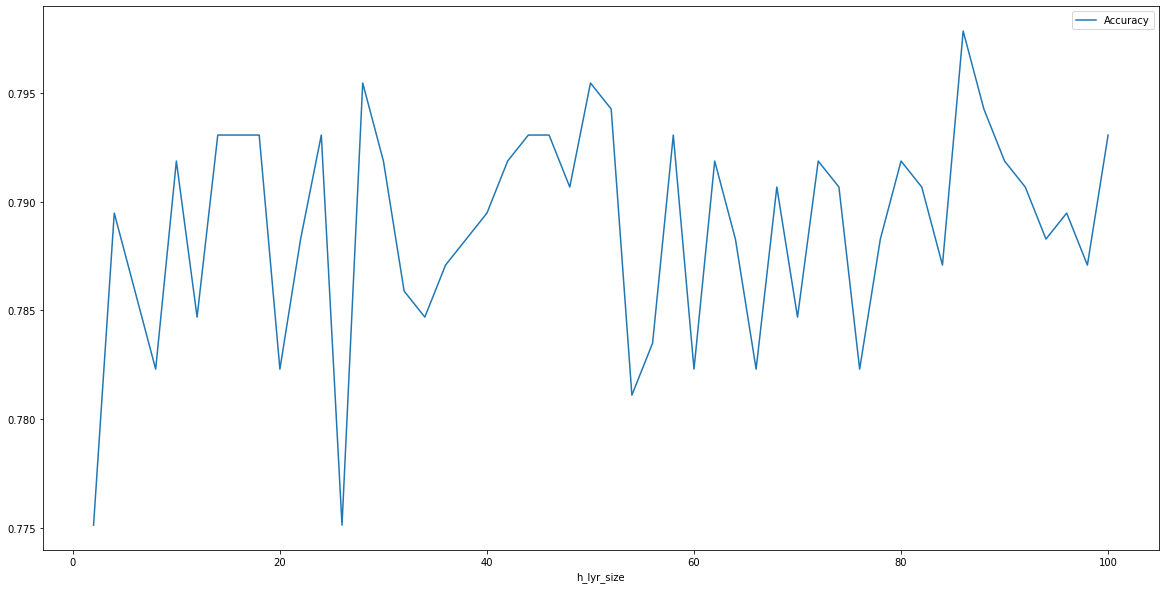

In [57]:
#visualize the difference of accuracy by the hidden layer size 
#and find the best hidden layer size

df_data1 = df_data1.set_index('h_lyr_size')
df_data1.plot(y='Accuracy', use_index=True, figsize=(20,10)) 
print(df_data1.max(), df_data1.idxmax(axis=0))

best hidden layer size = 86 -> accuracy = 0.797847

In [58]:
#test for the best actvation function

data2 = {'Accuracy': [], 'Activation': []}
df_data2 = pd.DataFrame(data2)

activ = ['identity', 'logistic', 'tanh', 'relu']
for i in activ:
  MLP_modified2 = MLPClassifier(hidden_layer_sizes=86, max_iter=1000, activation=i, random_state=42)
  MLP_modified2.fit(X_train, y_train)
  new_row = {'Accuracy': MLP_modified2.score(X_test, y_test),'Activation':i}
  df_data2 = df_data2.append(new_row, ignore_index=True)

df_data2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

,Accuracy,Activation
0,0.781100,identity
1,0.787081,logistic
2,0.776316,tanh
3,0.797847,relu


best activation function = relu -> accuracy = 0.797847

relu is default activation function 

let's try changing max iteration

In [59]:
data3 = {'Accuracy': [], 'Iteration': []}
df_data3 = pd.DataFrame(data3)

for i in range(1000,21001,2000):
  MLP_modified3 = MLPClassifier(hidden_layer_sizes=86, max_iter=i, activation='relu', random_state=42)
  MLP_modified3.fit(X_train, y_train)
  new_row = {'Accuracy': MLP_modified3.score(X_test, y_test),'Iteration':i}
  df_data3 = df_data3.append(new_row, ignore_index=True)

df_data3

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

,Accuracy,Iteration
0,0.797847,1000.0
1,0.797847,3000.0
2,0.797847,5000.0
3,0.797847,7000.0
4,0.797847,9000.0
5,0.797847,11000.0
6,0.797847,13000.0
7,0.797847,15000.0
8,0.797847,17000.0
9,0.797847,19000.0


Accuracy    0.797847
dtype: float64 Accuracy    1000.0
dtype: float64


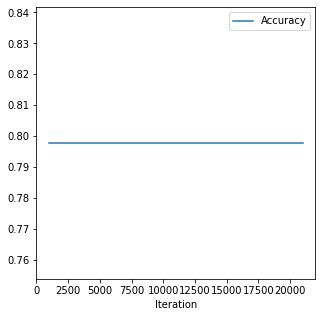

In [63]:
#visualize the difference of accuracy by the max iteration 
#and find the best max iteration 

df_data3.plot(y='Accuracy', use_index=True, figsize=(5,5)) 
print(df_data3.max(), df_data3.idxmax(axis=0))

it seems the number of iteration won't matter after 1000

1000 is enough

so for Question 3

We have modified the value of 1. number of hidden layers, 2. activation function 3. max number of iteration

with hidden layers of 86 and using activation function relu and number of iteration 1000 and above, we can reach the accuracy of 0.797847

**4. GridseachCV를 사용하여 best_params_를 찾고, 출력합니다.(위의 실습에서 사용한 parameter_space를 사용하여도, 본인이 설정하여 실험하여도 상관 없습니다.) (10점)**

In [65]:
parameter_space = {
    'hidden_layer_sizes': [(86,),(44,),(24,)],
    'activation': ['identity', 'logistic', 'relu'],
    'max_iter': [1000],
    'learning_rate': ['constant','adaptive'],
}
clf_cv_modified = GridSearchCV(MLPClassifier(random_state=42), parameter_space, n_jobs=-1, cv=10)
clf_cv_modified.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'hidden_layer_sizes': [(86,), (44,), (24,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1000]})

In [66]:
print('Best parameters found:\n', clf_cv_modified.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (44,), 'learning_rate': 'constant', 'max_iter': 1000}


In [67]:
print("Accuracy CV:",clf_cv_modified.best_score_)

Accuracy CV: 0.8076223107569721


**5. 4번에서 찾은 best parameter을 사용하여 새로운 MLPClassifier을 훈련시키고, confusion matrix를 출력합니다.(10점)**

In [68]:
final_config_gs = clf_cv_modified.best_params_
mlp_final=MLPClassifier(random_state=1, **final_config_gs)
mlp_final.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(44,), max_iter=1000, random_state=1)

[[ 980  271]
 [ 212 1042]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1251
           1       0.79      0.83      0.81      1254

    accuracy                           0.81      2505
   macro avg       0.81      0.81      0.81      2505
weighted avg       0.81      0.81      0.81      2505

[[321 100]
 [ 87 328]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       421
           1       0.77      0.79      0.78       415

    accuracy                           0.78       836
   macro avg       0.78      0.78      0.78       836
weighted avg       0.78      0.78      0.78       836



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


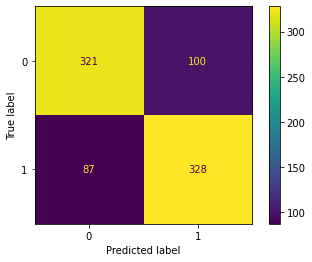

In [70]:
predict_train = mlp_final.predict(X_train)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

predict_test = mlp_final.predict(X_test)
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
plot_confusion_matrix(mlp_final, X_test, y_test, normalize=None, values_format='d')